## Gaussian Processes (GP) with GPy

*Deep Bayes summer school, 2018*

*A. Zaytsev, Y. Kapushev*


In this notebook we are going to use GPy library for GP modeling [SheffieldML github page](https://github.com/SheffieldML/GPy).

Why **GPy**?

* Specialized library of GP models (regression, classification, GPLVM)
* Variety of covariance functions is implemented
* There are GP models for large-scale problems
* Easy to use

Run the following line to install GPy library

In [1]:
!pip install GPy

    100% |████████████████████████████████| 860kB 167kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 129kB/s ta 0:00:01
  Running setup.py bdist_wheel for GPy ... done
  Stored in directory: /home/daniil/.cache/pip/wheels/36/b9/13/498e283b6081c81aded82d1c174f8c251096027be686e79005
  Running setup.py bdist_wheel for paramz ... done
  Stored in directory: /home/daniil/.cache/pip/wheels/5b/d6/3d/3ba4e455d8dfb30effec982d8a48668d1f2b16deb539554656
Successfully built GPy paramz
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import GPy

Current documentation of GPy library can be found [here](http://gpy.readthedocs.org/en/latest/).

## Gaussian Process Regression

A data set $\left (X, \mathbf{y} \right ) = \left \{ (x_i, y_i), x_i \in \mathbb{R}^d, y_i \in \mathbb{R} \right \}_{i = 1}^N$ is given.  

Assumption:
$$
y = f(x) + \varepsilon,
$$
where $f(x)$ is a Gaussian Processes and $\varepsilon \sim \mathcal{N}(0, \sigma_n^2)$ is a Gaussian noise .

Posterior distribution
$$
y_* | X, \mathbf{y}, x_* \sim \mathcal{N}(m(x_*), \sigma(x_*)),
$$
with predictive mean and variance given by
$$
m(x_*) = \mathbf{k}^T \mathbf{K}_y^{-1} \mathbf{y} = \sum_{i = 1}^N \alpha_i k(x_*, x_i),
$$
$$
\sigma^2(x_*) = k(x_*, x_*) - \mathbf{k}^T\mathbf{K}_y^{-1}\mathbf{k},
$$
where
$$
\mathbf{k} = \left ( k(x_*, x_1), \ldots, k(x_*, x_N) \right )^T
$$
$$
\mathbf{K}_y = \|k(x_i, x_j)\|_{i, j = 1}^N + \sigma_n^2 \mathbf{I}
$$

## Building GPR model

Lets fit GPR model for function $f(x) = − \cos(\pi x) + \sin(4\pi x)$ in $[0, 1]$,
with noise $y(x) = f(x) + \epsilon$, $\epsilon \sim \mathcal{N}(0, 0.1)$. 

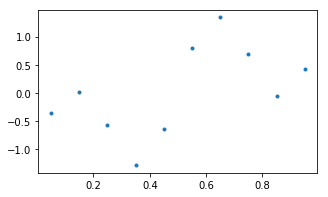

In [13]:
N = 10
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.1, size=(N, 1))
plt.figure(figsize=(5, 3))
plt.plot(X, Y, '.')

#### 1. Define covariance function

The most popular kernel - RBF kernel - has 2 parameters: `variance` and `lengthscale`, $k(x, y) = \sigma^2 \exp\left ( -\dfrac{\|x - y\|^2}{2l^2}\right )$,
where `variance` is $\sigma^2$, and `lengthscale` - $l$.

In [14]:
input_dim = 1
variance = 1
lengthscale = 0.2
kernel = GPy.kern.RBF(input_dim, variance=variance,
                      lengthscale=lengthscale)

#### 2. Create GPR model


Name : GP regression
Objective : 13.126931659953135
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    0.2  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


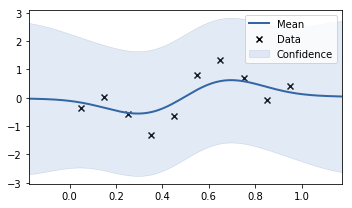

In [15]:
model = GPy.models.GPRegression(X, Y, kernel)
print(model)
model.plot(figsize=(5, 3))

### Parameters of the covariance function

Values of parameters of covariance function can be set like:  `k.lengthscale = 0.1`.

Let's change the value of `lengthscale` parameter and see how it changes the covariance function.

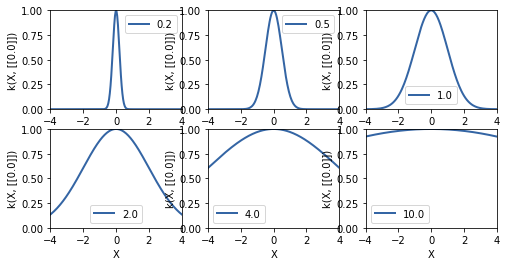

In [16]:
k = GPy.kern.RBF(1)
theta = np.asarray([0.2, 0.5, 1, 2, 4, 10])
figure, axes = plt.subplots(2, 3, figsize=(8, 4))
for t, ax in zip(theta, axes.ravel()):
    k.lengthscale = t
    k.plot(ax=ax)
    ax.set_ylim([0, 1])
    ax.set_xlim([-4, 4])
    ax.legend([t])

### Task
Try to change parameters to obtain more accurate model.

In [34]:
######## Your code here ########
kernel = GPy.kern.RBF(input_dim,
                      lengthscale=0.5)
model = GPy.models.GPRegression(X, Y, kernel)


Name : GP regression
Objective : 138.46053373339117
Number of Parameters : 3
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    0.5  |      +ve      |        
  Gaussian_noise.variance  |   0.01  |   +ve fixed   |        


 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


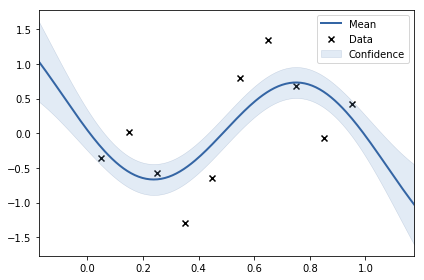

In [35]:
model.Gaussian_noise.variance.fix(0.01)
print(model)
model.plot()

### Tuning parameters of the covariance function

The parameters are tuned by maximizing likelihood. To do it just use `optimize()` method of the model.


Name : GP regression
Objective : 5.852330415564994
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     1.7221603162810202  |      +ve      |        
  rbf.lengthscale          |    0.16553444450009713  |      +ve      |        
  Gaussian_noise.variance  |  4.014949504617637e-09  |      +ve      |        


 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


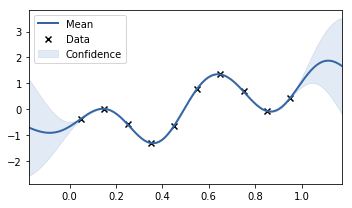

In [36]:
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()
print(model)
model.plot(figsize=(5, 3))

### Noise variance

Noise variance acts like a regularization in GP models. Larger values of noise variance lead to more smooth model.  
Let's check it: try to change noise variance to some large value, to some small value and see the results.

Noise variance accessed like this: `model.Gaussian_noise.variance = 1`

 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


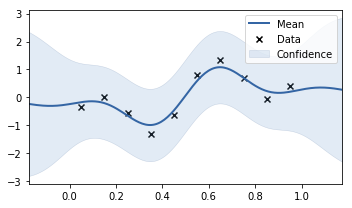

In [40]:
######## Your code here ########
model.Gaussian_noise.variance = 0.3
model.plot(figsize=(5, 3))

Now, let's generate more noisy data and try to fit model.


Name : GP regression
Objective : 44.04984129323836
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.9498909468493338  |      +ve      |        
  rbf.lengthscale          |  0.09874239463632281  |      +ve      |        
  Gaussian_noise.variance  |   0.3102029948392397  |      +ve      |        


 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


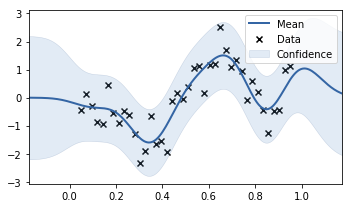

In [41]:
N = 40
X = np.linspace(0.05, 0.95, N).reshape(-1, 1)
Y = -np.cos(np.pi * X) + np.sin(4 * np.pi * X) + \
    np.random.normal(loc=0.0, scale=0.5, size=(N, 1))

kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel)
model.optimize()
print(model)
model.plot(figsize=(5, 3))

Now, let's fix noise variance to some small value and fit the model

 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


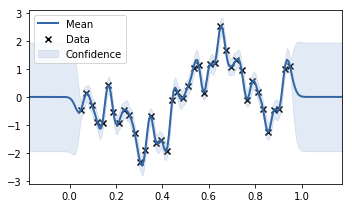

In [42]:
kernel = GPy.kern.RBF(1)
model = GPy.models.GPRegression(X, Y, kernel)
model.Gaussian_noise.variance.fix(0.01)
model.optimize()
model.plot(figsize=(5, 3))

## Approximate multi-dimensional function

In [43]:
def rosenbrock(x):
    x = 0.5 * (4 * x - 2)
    y = np.sum((1 - x[:, :-1])**2 +
                100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)
    return y

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error

def plot_2d_func(func, n_rows=1, n_cols=1, title=None):
    grid_size = 100
    x_grid = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
    x_grid = np.hstack((x_grid[0].reshape(-1, 1), x_grid[1].reshape(-1, 1)))
    y = func(x_grid)
    fig = plt.figure(figsize=(n_cols * 6, n_rows * 6))
    ax = fig.add_subplot(n_rows, n_cols, 1, projection='3d')
    ax.plot_surface(x_grid[:, 0].reshape(grid_size, grid_size), x_grid[:, 1].reshape(grid_size, grid_size),
                    y.reshape(grid_size, grid_size),
                    cmap=cm.jet, rstride=1, cstride=1)
    if title is not None:
        ax.set_title(title)
    return fig

#### Here how the function looks like in 2D

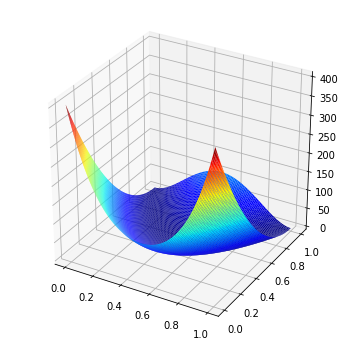

In [45]:
fig = plot_2d_func(rosenbrock)

### Training set
Note that it is 3-dimensional now

In [46]:
dim = 3
x_train = np.random.rand(300, dim)
y_train = rosenbrock(x_train).reshape(-1, 1)

### Task

Try to approximate Rosenbrock function using RBF kernel. MSE (mean squared error) should be $<10^{-2}$.
**Hint**: if results are not good maybe it is due to bad local minimum. You can do one of the following things:
1. Try to use multi-start by calling `model.optimize_restarts(n_restarts)` method of the model.
2. Constrain model parameters to some reasonable bounds. You can do it for example as follows:
`model.Gaussian_noise.variance.constrain_bounded(0, 1)`


In [47]:
######## Your code here ########
kernel = GPy.kern.RBF(dim)
model= GPy.models.GPRegression(x_train, y_train, kernel)
model.optimize_restarts(5)

Optimization restart 1/5, f = -187.4746761650552
Optimization restart 2/5, f = -109.12951876870176


 /home/daniil/anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:overflow encountered in square


Optimization restart 3/5, f = -120.48710366596782
Optimization restart 4/5, f = -175.8339372895387
Optimization restart 5/5, f = -173.17857984052029


In [48]:
x_test = np.random.rand(3000, dim)
y_test = rosenbrock(x_test)
y_pr = model.predict(x_test)[0]

mse = mean_squared_error(y_test.ravel(), y_pr.ravel())
print('\nMSE: {}'.format(mse))


MSE: 0.00022155191562389025


### Covariance functions

Short info about covariance function can be printed using `print(k)`. 

In [49]:
k = GPy.kern.RBF(1)
print(k)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        


You can plot the covariance function using `plot()` method.

 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


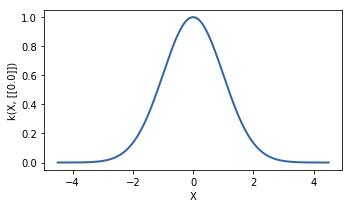

In [50]:
k.plot(figsize=(5, 3))

## More "complex" functions
The most popular covariance function is RBF. However, not all the functions can be modelled using RBF covariance function. For example, approximations of discontinuous functions will suffer from oscillations, approximation of curvy function may suffer from oversmoothing.

In [51]:
def heaviside(x):
    return np.asfarray(x > 0)


def rastrigin(x):
    """
    Parameters
    ==========
        x : ndarray - 2D array in [0, 1]
    
    Returns
    =======
        1D array of values of Rastrigin function
    """
    scale = 8  # 10.24
    x = scale * x - scale / 2
    y = 10 * x.shape[1] + (x**2).sum(axis=1) - 10 * np.cos(2 * np.pi * x).sum(axis=1)
    return y

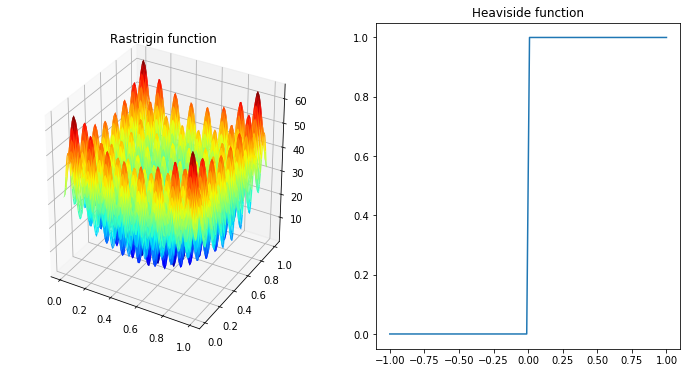

In [52]:
fig = plot_2d_func(rastrigin, 1, 2, title='Rastrigin function')

x = np.linspace(-1, 1, 100)
y = heaviside(x)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y)
ax.set_title('Heaviside function')
plt.show()

#### Example of oscillations
As you can see there are oscillations in viscinity of discontinuity because we are trying to approximate
discontinuous function using infinitily smooth function.

(-0.2, 1.2)

 /home/daniil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


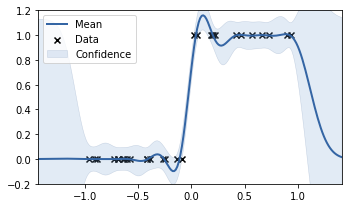

In [53]:
np.random.seed(42)
X = np.random.rand(30, 1) * 2 - 1
y = heaviside(X)

k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

m = GPy.models.GPRegression(X, y, k)
m.optimize()
m.plot(figsize=(5, 3))
plt.ylim([-0.2, 1.2])

#### Example of oversmoothing
Actually, the GP model only approximates trend of the function.
All the curves are treated as noise.
The knowledge about this (in fact there is some repeated structure) should be incorporated into the model via kernel function.

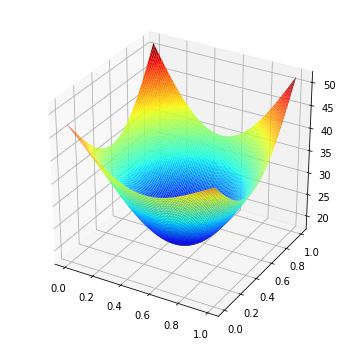

In [54]:
np.random.seed(42)

X = np.random.rand(300, 2)
y = rastrigin(X)

k = GPy.kern.RBF(input_dim=2)

m = GPy.models.GPRegression(X, y.reshape(-1, 1), k)
m.optimize()
fig = plot_2d_func(lambda x: m.predict(x)[0])

### Covariance functions in GPy

Popular covariance functions: `Exponential`, `Matern32`, `Matern52`, `RatQuad`, `Linear`, `StdPeriodic`. 

* Exponential:
$$
k(x, x') = \sigma^2 \exp \left (-\frac{r}{l} \right), \quad r = \|x - x'\|
$$

* Matern32
$$
k(x, x') = \sigma^2 \left (1 + \sqrt{3}\frac{r}{l} \right )\exp \left (-\sqrt{3}\frac{r}{l} \right )
$$

* Matern52
$$
k(x, x') = \sigma^2 \left (1 + \sqrt{5}\frac{r}{l} + \frac{5}{3}\frac{r^2}{l^2} \right ) \exp \left (-\sqrt{5}\frac{r}{l} \right )
$$

* RatQuad
$$
k(x, x') = \left ( 1 + \frac{r^2}{2\alpha l^2}\right )^{-\alpha}
$$

* Linear
$$
k(x, x') = \sum_i \sigma_i^2 x_i x_i'
$$

* Poly
$$
k(x, x') = \sigma^2 (x^T x' + c)^d
$$

* StdPeriodic
$$
k(x, x') = \sigma^2 \exp\left ( -2 \frac{\sin^2(\pi r)}{l^2}\right )
$$

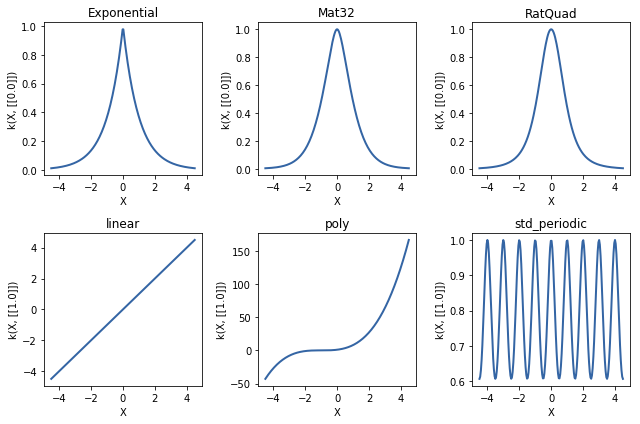

In [55]:
covariance_functions = [GPy.kern.Exponential(1), GPy.kern.Matern32(1),
                        GPy.kern.RatQuad(1), GPy.kern.Linear(1),
                        GPy.kern.Poly(1), GPy.kern.StdPeriodic(1)]
figure, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.ravel()
for i, k in enumerate(covariance_functions):
    k.plot(ax=axes[i])
    axes[i].set_title(k.name)
figure.tight_layout()

## Combination of covariance functions

* Sum of covariance function is a valid covariance function:

$$
k(x, x') = k_1(x, x') + k_2(x, x')
$$

* Product of covariance functions is a valid covariance funciton:
$$
k(x, x') = k_1(x, x') k_2(x, x')
$$

### Combinations of covariance functions in GPy

In GPy to combine covariance functions you can just use operators `+` and `*`.

Let's plot some of the combinations

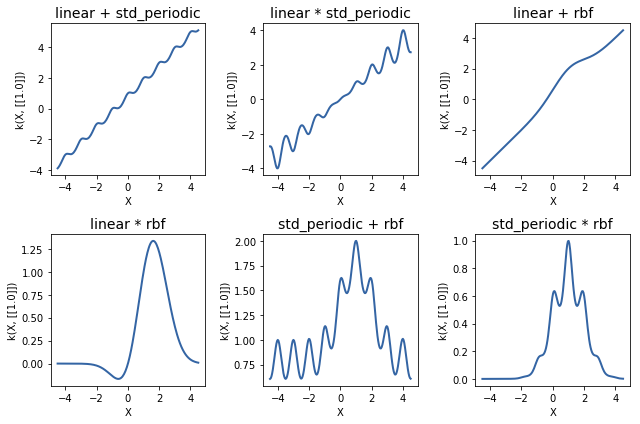

In [56]:
covariance_functions = [GPy.kern.Linear(input_dim=1), GPy.kern.StdPeriodic(input_dim=1), GPy.kern.RBF(input_dim=1, lengthscale=1)]
operations = {'+': lambda x, y: x + y, '*': lambda x, y: x * y}

figure, axes = plt.subplots(len(operations), len(covariance_functions), figsize=(9, 6))

import itertools
axes = axes.ravel()
count = 0
for j, base_kernels in enumerate(itertools.combinations(covariance_functions, 2)):
    for k, (op_name, op) in enumerate(operations.items()):
        kernel = op(base_kernels[0], base_kernels[1])
        kernel.plot(ax=axes[count])
        axes[count].set_title('{} {} {}'.format(base_kernels[0].name, op_name, base_kernels[1].name),
                              fontsize=14)
        count += 1
figure.tight_layout()

### Additive kernels

One of the popular approach to model the function of interest is
$$
f(x) = \sum_{i=1}^d f_i(x_i) + \sum_{i < j} f_{ij}(x_i, x_j) + \ldots
$$

**Example**: $\quad f(x_1, x_2) = f_1(x_1) + f_2(x_2)$  
To model it using GP use additive kernel $\quad k(x, y) = k_1(x_1, y_1) + k_2(x_2, y_2)$.

More general - add kernels each depending on subset of inputs
$$
k(x, y) = k_1(x, y) + \ldots + k_D(x, y),
$$
where, for example, $k_1(x, x') = k_1(x_1, x_1'), \; k_2(x, x') = k_2((x_1, x_3), (x_1', x_3'))$, etc.

Here is an example of ${\rm RBF}(x_1) + {\rm RBF}(x_2)$

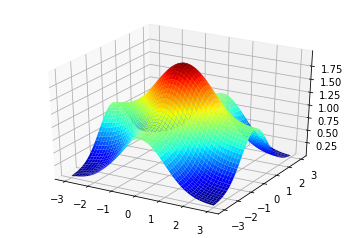

In [57]:
k1 = GPy.kern.RBF(1, active_dims=[0])
k2 = GPy.kern.RBF(1, active_dims=[1])

kernel = k1 + k2

x = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
x = np.hstack((x[0].reshape(-1, 1), x[1].reshape(-1, 1)))
z = kernel.K(x, np.array([[0, 0]]))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.plot_surface(x[:, 0].reshape(50, 50), x[:, 1].reshape(50, 50), z.reshape(50, 50), cmap=cm.jet)
plt.show()

### Kernels on arbitrary types of objects

Kernels can be defined over all types of data structures: text, images, matrices, graphs, etc. You just need to define similarity between objects.

#### Kernels on categorical data

* Represent your categorical variable as a by a one-of-k encoding: $\quad x = (x_1, \ldots, x_k)$.
* Use RBF kernel with `ARD=True`: $\quad k(x , x') = \sigma^2 \prod_{i = 1}^k\exp{\left ( -\dfrac{(x_i - x_i')^2}{\sigma_i^2} \right )}$. The lengthscale will now encode whether the rest of the function changes.
* Short lengthscales for categorical variables means your model is not sharing any information between data of different categories. 

## 2 Sampling from GP

So, you have defined some complex kernel.
You can plot it to see how it looks and guess what kind of functions it can approximate.
Another way to do it is to actually generate random functions using this kernel.

GP defines distribution over functions, which is defined by its *mean function* $m(x)$ and *covariance function* $k(x, y)$: for any set $\mathbf{x}_1, \ldots, \mathbf{x}_N \in \mathbb{R}^d \rightarrow$ $\left (f(\mathbf{x}_1), \ldots, f(\mathbf{x}_N) \right ) \sim \mathcal{N}(\mathbf{m}, \mathbf{K})$,
where $\mathcal{m} = (m(\mathbf{x}_1, \ldots, \mathbf{x}_N)$, $\mathbf{K} = \|k(\mathbf{x}_i, \mathbf{x}_j)\|_{i,j=1}^N$.

Sampling procedure:

1. Generate set of points $\mathbf{x}_1, \ldots, \mathbf{x}_N$.
2. Calculate mean and covariance matrix $\mathcal{m} = (m(\mathbf{x}_1, \ldots, \mathbf{x}_N)$, $\mathbf{K} = \|k(\mathbf{x}_i, \mathbf{x}_j)\|_{i,j=1}^N$.
3. Generate vector from multivariate normal distribution $\mathcal{N}(\mathbf{m}, \mathbf{K})$.

Below try to change RBF kernel to some other kernel and see the results.

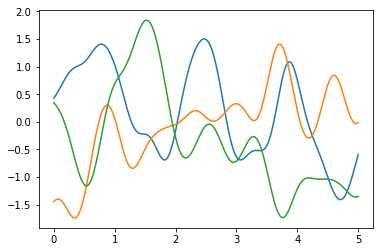

In [58]:
k = GPy.kern.RBF(input_dim=1, lengthscale=0.3)

X = np.linspace(0, 5, 500).reshape(-1, 1)

mu = np.zeros(500)
C = k.K(X, X)

Z = np.random.multivariate_normal(mu, C, 3)

plt.figure()
for i in range(3):
    plt.plot(X, Z[i, :])

### Task

Build a GP model that predicts airline passenger counts on international flights.

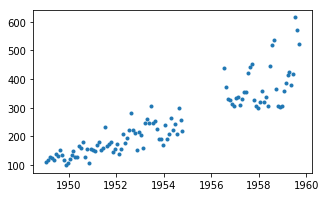

In [59]:
data = np.load('airline.npz')

X = data['X']
y = data['y']

train_indices = list(range(70)) + list(range(90, 129))
test_indices = range(70, 90)
X_train = X[train_indices]
y_train = y[train_indices]

X_test = X[test_indices]
y_test = y[test_indices]

plt.figure(figsize=(5, 3))
plt.plot(X_train, y_train, '.')

You need to obtain something like this

<img src="airline_result.png">

In [60]:
def plot_model(X, y, model):
    x = np.linspace(1948, 1964, 400).reshape(-1, 1)
    prediction_mean, prediction_var = model.predict(x)
    prediction_std = np.sqrt(prediction_var).ravel()
    prediction_mean = prediction_mean.ravel()
    
    plt.figure(figsize=(5, 3))
    plt.plot(X, y, '.', label='Train data')
    plt.plot(x, prediction_mean, label='Prediction')
    plt.fill_between(x.ravel(), prediction_mean - prediction_std, prediction_mean + prediction_std, alpha=0.3)

#### Let's try RBF kernel

In [ ]:
######## Your code here ########
k_rbf = 

As you can see below it doesn't work ;(

In [ ]:
model = GPy.models.GPRegression(X, y, k_rbf)
model.optimize()
print(model)
plot_model(X_train, y_train, model)

We will try to model this data set using 3 additive components: trend, seasonality and noise.  
So, the kernel should be a sum of 3 kernels:  
`kernel = kernel_trend + kernel_seasonality + kernel_noise`

#### Let's first try to model trend

Trend is almost linear with some small nonlinearity, so you can use sum of linear kernel with some other which gives this small nonlinearity.

In [ ]:
######## Your code here ########
k_trend = 

In [ ]:
model = GPy.models.GPRegression(X, y, k_trend)
model.optimize()
print(model)
plot_model(X_train, y_train, model)

#### Let's model periodicity
Just periodic kernel will not work (why?).
Try to use product of periodic kernel with some other kernel (or maybe 2 other kernels).
Note that the amplitude increases with x.

In [ ]:
######## Your code here ########
k_trend = 
k_seasonal = 

In [ ]:
kernel = k_trend + k_seasonal
model = GPy.models.GPRegression(X, y, kernel)
model.optimize()
print(model)
plot_model(X_train, y_train, model)

#### Let's add noise model
The dataset is heteroscedastic, i.e. noise variance depends on x: it increases linearly with x.
Noise can be modeled using `GPy.kern.White(1)`, but it assumes that noise variance is the same at every x.
By what kernel it should be multiplied?

In [ ]:
######## Your code here ########
k_trend = 
k_periodicity = 
k_noise = 

In [ ]:
kernel = k_trend + k_periodicity + k_noise
model = GPy.models.GPRegression(X, y, kernel)
model.optimize()
print(model)
plot_model(X_train, y_train, model)

# Automatic covariance structure search
We can construct kernel is automatic way.
Here is our data set (almost the same)

In [ ]:
idx_test = np.where((X[:,0] > 1957))[0]
idx_train = np.where((X[:,0] <= 1957))[0]
X_train = X[idx_train]
y_train = y[idx_train]

X_test = X[idx_test]
y_test = y[idx_test]

plt.figure(figsize=(7, 5))
plt.plot(X_train, y_train, '.', color='red');
plt.plot(X_test, y_test, '.', color='green');

In [ ]:
def plot_model_learned(X, y, train_idx, test_idx, model):
    prediction_mean, prediction_var = model.predict(X)
    prediction_std = np.sqrt(prediction_var).ravel()
    prediction_mean = prediction_mean.ravel()
    
    plt.figure(figsize=(7, 5))
    plt.plot(X, y, '.')
    plt.plot(X[train_idx], y[train_idx], '.', color='green')
    plt.plot(X, prediction_mean, color='red')
    plt.fill_between(X.ravel(), prediction_mean - prediction_std, prediction_mean + prediction_std, alpha=0.3)

## Expressing Sturcture Through Kernels

For example:

$$
\underbrace{\text{RBF}\times\text{Lin}}_\text{increasing trend} + \underbrace{\text{RBF}\times\text{Per}}_\text{varying-amplitude periodic} + \underbrace{\text{RBF}}_\text{residual}
$$

## Greedy Searching for the Optimum Kernel Combination

One can wonder: how to automatically search the kernel structure? We can optimize some criteria, which balance between a loss function value and the complexity of the model.
Reasinobale candidate for this is BIC-criteria:

$$
BIC = - 2. \text{Log-Liklihood} + m \cdot\log{n}
$$

where $n$ sample size and $m$ number of the parameters.

However, the procedure of fitting Gaussian Process is quite expensive $O(n^3)$. Hence,  instead of the combinatorial search through all possible combinations, we grow the kernel structure greedy.

You can find more details at the https://github.com/jamesrobertlloyd/gp-structure-search. For now, we present toy-example algorithm.

Consider the set of operations:

$$
\text{Algebra: } +,\times
$$

and the set of basic kernels:

$$
\text{Kernels: } \text{Poly}, \text{RBF}, \text{Periodic}
$$

For each level we select extenstion of our current kernel with the lowest BIC. This is an example of the possible kernel grow process (mark notes the lowest BIC at the level):

<img src='gp.png'>

### Task*
Implement function that trains a model with given kernel and dataset, calculates and returns BIC
The log-lilkelihood of the model can be calculated using `model.log_likelihood()` method,
number of parameters of the model you can get via `len(model.param_array)`.

In [ ]:
def train_model_get_bic(X_train, y_train, kernel, num_restarts=1):
    '''
    Input:
        X_train: numpy array of train features, n*d (d>=1)
        y_train: numpy array n*1
        kernel: GPy object kern
        num_restars: number of the restarts of the optimization routine
    Output:
        bic value
    '''
    kernel = kernel.copy()
    
    ######## Your code here ########

    return bic 

Here is a utility function which take list of kernels and operations between them, calculates all product kernels
and returns a list of them.
After that we need only take sum of the kernels from this list.

In [ ]:
def _get_all_product_kernels(op_list, kernel_list):
    '''
    Find product pairs and calculate them.
    For example, if we are given expression:
        K = k1 * k2 + k3 * k4 * k5
    the function will calculate all the product kernels
        k_mul_1 = k1 * k2
        k_mul_2 = k3 * k4 * k5
    and return list [k_mul_1, k_mul_2].
    '''
    product_index = np.where(np.array(op_list) == '*')[0]
    if len(product_index) == 0:
        return kernel_list

    product_index = product_index[0]
    product_kernel = kernel_list[product_index] * kernel_list[product_index + 1]
    
    if len(op_list) == product_index + 1:
        kernel_list_copy = kernel_list[:product_index] + [product_kernel]
        op_list_copy = op_list[:product_index]
    else:
        kernel_list_copy = kernel_list[:product_index] + [product_kernel] + kernel_list[product_index + 2:]
        op_list_copy = op_list[:product_index] + op_list[product_index + 1:]
        
    return _get_all_product_kernels(op_list_copy, kernel_list_copy)

### Task*

This is the main class, you need to implement several methods inside
1. method `init_kernel()` - this function constructs initial model, i.e. the model with one kernel. You need just iterate through the list of base kernels and choose the best one according to BIC
2. method `grow_level()` - this function adds new level. You need to iterate through all base kernels and all operations,
apply each operation to the previously constructed kernel and each base kernel (use method `_make_kernel()` for this) and then choose the best one according to BIC.

In [ ]:
class GreedyKernel:
    '''
    Class for greedy growing kernel structure
    '''
    def __init__(self, algebra, base_kernels):
        self.algebra = algebra
        self.base_kernels = base_kernels
        self.kernel = None
        self.kernel_list = []
        self.op_list = []
        self.str_kernel = None
    
    def _make_kernel(self, op_list, kernel_list):
        '''
        Sumation in kernel experssion
        '''
        kernels_to_sum = _get_all_product_kernels(op_list, kernel_list)
        new_kernel = kernels_to_sum[0]
        for k in kernels_to_sum[1:]:
            new_kernel = new_kernel + k
        return new_kernel
    
    def init_kernel(self, X_train, y_train):
        '''
        Initialization of first kernel
        '''
        best_kernel = None
        
        ###### Your code here ######

        # You need just iterate through the list of base kernels and choose the best one according to BIC
        # save the kernel in `best_kernel` variable
        
        # base kernels are given by self.base_kernels --- list of kernel objects
        
        
        
        
        ############################
        
        assert best_kernel is not None
        
        self.kernel_list.append(best_kernel)
        self.str_kernel = str(best_kernel.name)
        
    def grow_level(self, X_train, y_train):
        '''
        Select optimal extension of current kernel 
        '''
        
        best_kernel = None  # should be kernel object
        best_op = None  # should be operation name, i.e. "+" or "*"
        
        ###### Your code here ######
        
        # You need to iterate through all base kernels and all operations,
        # apply each operation to the previously constructed kernel and each base kernel
        # (use method `_make_kernel()` for this) and then choose the best one according to BIC.
        
        # base kernels are given by self.base_kernels --- list of kernel objects
        # operations are given by self.algebra --- dictionary:
        #                                              {"+": lambda x, y: x + y
        #                                               "*": lambda x, y: x * y}

        # best_kernel - kernel object, store in this variable the best found kernel
        # best_op - '+' or '*', store in this variable the best found operation
        
        
        
        
        ############################

        assert best_kernel is not None
        assert best_op is not None
        
        self.kernel_list.append(best_kernel)
        self.op_list.append(best_op)
        
        new_kernel = self._make_kernel(self.op_list, self.kernel_list)
        str_new_kernel = '{} {} {}'.format(self.str_kernel, best_op, best_kernel.name)
        
        return new_kernel, str_new_kernel
    
    def grow_tree(self, X_train, y_train, max_depth):
        '''
        Greedy kernel growing
        '''
        if self.kernel == None:
            self.init_kernel(X_train, y_train)
            
        for i in range(max_depth):
            self.kernel, self.str_kernel = self.grow_level(X_train, y_train)
            print(self.str_kernel)
            
    def fit_model(self, X_train, y_train, kernel, num_restarts=1):
        model = GPy.models.GPRegression(X_train, y_train, kernel)
        model.optimize_restarts(num_restarts, verbose=False)
        return model

Now let us define the algebra and list of base kernels.
To make learning process more robust we constrain some parameters of the kernels to lie within
some reasonable intervals

In [ ]:
# operations under kernels:

algebra = {'+': lambda x, y: x + y,
           '*': lambda x, y: x * y
          }

# basic kernels list:
poly_kern = GPy.kern.Poly(input_dim=1, order=1)

periodic_kern = GPy.kern.StdPeriodic(input_dim=1)
periodic_kern.period.constrain_bounded(1e-2, 1e1)
periodic_kern.lengthscale.constrain_bounded(1e-2, 1e1)

rbf_kern = GPy.kern.RBF(input_dim=1)
rbf_kern.lengthscale.constrain_bounded(1e-2, 1e1)

bias_kern = GPy.kern.Bias(1)

kernels_list = [poly_kern, periodic_kern, rbf_kern]

Let's train the model.
You should obtain something which is more accurate than the trend model ;)

In [ ]:
GK = GreedyKernel(algebra, kernels_list)
GK.grow_tree(X_train, y_train, 4)
model = GK.fit_model(X_train, y_train, GK.kernel)
plot_model_learned(X, y, idx_train, idx_test, model)

## Bonus Task
Try to approximate rastrigin function

In [ ]:
fig = plot_2d_func(rastrigin)

### Training set

In [ ]:
np.random.rand(42)
x_train = np.random.rand(200, 2)
y_train = rastrigin(x_train)

#### Hint: you can constrain parameters of the covariance functions, for example
`model.std_periodic.period.constrain_bounded(0, 0.2)`.

In [ ]:
######## Your code here ########
model = 

In [ ]:
print(model)

x_test = np.random.rand(1000, 2)
y_test = rastrigin(x_test)
y_pr = model.predict(x_test)[0]

mse = mean_squared_error(y_test.ravel(), y_pr.ravel())
print('MSE: {}'.format(mse))

fig = plot_2d_func(lambda x: model.predict(x)[0])

# Appendix: Gaussian Process Classification

### Classification

A data set $\left (X, \mathbf{y} \right ) = \left \{ (x_i, y_i), x_i \in \mathbb{R}^d, y_i \in \{+1, -1\} \right \}_{i = 1}^N$ is given.  

Assumption:
$$
p(y = +1 \; | \; x) = \sigma(f(x)) = \pi(x),
$$
where latent function $f(x)$ is a Gaussian Processes.

We need to produce a probabilistic prediction
$$
\pi_* = p(y_* \; | \; X, \mathbf{y}, x_*) = \int \sigma(f_*) p(f_* \; | \; X, \mathbf{y}, x_*) df_*,
$$
$$
p(f_* \; | \; X, \mathbf{y}, x_*) = \int p(f_* \; | \; X, x_*, \mathbf{f}) p(\mathbf{f} \; | \; X, \mathbf{y}) d\mathbf{f},
$$
where $p(\mathbf{f} \; |\; X, \mathbf{y}) = \dfrac{p(\mathbf{y} | X, \mathbf{f}) p(\mathbf{f} | X)}{p(\mathbf{y} | X)}$ is the posterior over the latent variables.

Both integrals are intractable.

Use approximation technique like Laplace approximation or Expectation Propagation.

In [ ]:
from matplotlib import cm

def cylinder(x):
    y = (1 / 7.0 - (x[:, 0] - 0.5)**2 - (x[:, 1] - 0.5)**2) > 0
    return y

np.random.seed(42)
X = np.random.rand(40, 2)
y = cylinder(X)

x_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
y_grid = cylinder(np.hstack((x_grid[0].reshape(-1, 1), x_grid[1].reshape(-1, 1)))).reshape(x_grid[0].shape)

positive_idx = y == 1
plt.figure(figsize=(5, 3))
plt.plot(X[positive_idx, 0], X[positive_idx, 1], '.', markersize=10, label='Positive')
plt.plot(X[~positive_idx, 0], X[~positive_idx, 1], '.', markersize=10, label='Negative')
im = plt.contour(x_grid[0], x_grid[1], y_grid, 10, cmap=cm.hot)
plt.colorbar(im)
plt.legend()
plt.show()

In [ ]:
kernel = GPy.kern.RBF(2, variance=1., lengthscale=0.2, ARD=True)

model = GPy.models.GPClassification(X, y.reshape(-1, 1), kernel=kernel)
model.optimize()
print(model)


def plot_model_2d(model):

    model.plot(levels=40, resolution=80, plot_data=False, figsize=(5, 3))
    plt.plot(X[positive_idx, 0], X[positive_idx, 1], '.', markersize=10, label='Positive')
    plt.plot(X[~positive_idx, 0], X[~positive_idx, 1], '.', markersize=10, label='Negative')
    plt.legend()
    plt.show()
    
plot_model_2d(model)

Let's change lengthscale to some small value

In [ ]:
model.rbf.lengthscale = [0.05, 0.05]
plot_model_2d(model)